In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
txt1 = inaugural.raw('1941-Roosevelt.txt')
txt2 = inaugural.raw('1961-Kennedy.txt')
txt3 = inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [ ]:
txt1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [ ]:
txt2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [ ]:
txt3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [ ]:
len(txt1)

7571

In [ ]:
len(txt2)

7618

In [ ]:
len(txt3)

9991

In [ ]:
from nltk.tokenize import sent_tokenize

tokenized_text1=sent_tokenize(txt1)

print(tokenized_text1)

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.', "In Washington's day the task of the people was to create and weld together a nation.", "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.", 'In this day the task of the people is to save that Nation and its institutions from disruption from without.', 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be.', 'If we do not, we risk the real peril of inaction.', 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit.', 'The life of a man is three-score years and ten: a little more, a little less.', 'The life of a nation is the fullness of the measure of its will to live.', 'There are men who doubt this.', 'There are men who believe 

In [ ]:
len(tokenized_text1)

68

In [ ]:
from nltk.tokenize import sent_tokenize

tokenized_text2=sent_tokenize(txt2)

print(tokenized_text2)

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change.', 'For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.', 'The world is very different now.', 'For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life.', 'And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.', 'We dare not forget today that we are the heirs of that first revolution.', 'Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed t

In [ ]:
len(tokenized_text2)

52

In [ ]:
from nltk.tokenize import sent_tokenize

tokenized_text3=sent_tokenize(txt3)

print(tokenized_text3)

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.', 'As we meet here today, we stand on the threshold of a new era of peace in the world.', 'The central question before us is: How shall we use that peace?', 'Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.', 'Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.', 'This past year saw far-reaching results from our new policies for peace.', 'By continuing to revitalize our trad

In [ ]:
len(tokenized_text3)

68

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word1 = word_tokenize(txt1)
print(tokenized_word1)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [ ]:
len(tokenized_word1)

1526

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word2 = word_tokenize(txt2)
print(tokenized_word2)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [ ]:
len(tokenized_word2)

1543

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word3 = word_tokenize(txt3)
print(tokenized_word3)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

In [ ]:
len(tokenized_word3)

2006

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


text_tokens = word_tokenize(txt1)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'doubt', '.', 'There', 'believe', 'democracy', ',', 'form', 'Government', 'frame', 'life', ',', 'limited', 'measure

In [ ]:
filtered_sentence = (" ").join(tokens_without_sw)
print(filtered_sentence)

On national day inauguration since 1789 , people renewed sense dedication United States . In Washington 's day task people create weld together nation . In Lincoln 's day task people preserve Nation disruption within . In day task people save Nation institutions disruption without . To us time , midst swift happenings , pause moment stock -- recall place history , rediscover may . If , risk real peril inaction . Lives nations determined count years , lifetime human spirit . The life three-score years ten : little , little less . The life nation fullness measure live . There doubt . There believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . But Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . We midst shock -- acted . We acted quickly , boldly , decisively . These later years living years -- fruitful ye

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


text_tokens1 = word_tokenize(txt2)

tokens_without_sw1 = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'doubt', '.', 'There', 'believe', 'democracy', ',', 'form', 'Government', 'frame', 'life', ',', 'limited', 'measure

In [ ]:
filtered_sentence1 = (" ").join(tokens_without_sw)
print(filtered_sentence1)

On national day inauguration since 1789 , people renewed sense dedication United States . In Washington 's day task people create weld together nation . In Lincoln 's day task people preserve Nation disruption within . In day task people save Nation institutions disruption without . To us time , midst swift happenings , pause moment stock -- recall place history , rediscover may . If , risk real peril inaction . Lives nations determined count years , lifetime human spirit . The life three-score years ten : little , little less . The life nation fullness measure live . There doubt . There believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . But Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . We midst shock -- acted . We acted quickly , boldly , decisively . These later years living years -- fruitful ye

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


text_tokens2 = word_tokenize(txt3)

tokens_without_sw2 = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amjur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['On', 'national', 'day', 'inauguration', 'since', '1789', ',', 'people', 'renewed', 'sense', 'dedication', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within', '.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without', '.', 'To', 'us', 'time', ',', 'midst', 'swift', 'happenings', ',', 'pause', 'moment', 'stock', '--', 'recall', 'place', 'history', ',', 'rediscover', 'may', '.', 'If', ',', 'risk', 'real', 'peril', 'inaction', '.', 'Lives', 'nations', 'determined', 'count', 'years', ',', 'lifetime', 'human', 'spirit', '.', 'The', 'life', 'three-score', 'years', 'ten', ':', 'little', ',', 'little', 'less', '.', 'The', 'life', 'nation', 'fullness', 'measure', 'live', '.', 'There', 'doubt', '.', 'There', 'believe', 'democracy', ',', 'form', 'Government', 'frame', 'life', ',', 'limited', 'measure

In [ ]:
filtered_sentence2 = (" ").join(tokens_without_sw)
print(filtered_sentence2)

On national day inauguration since 1789 , people renewed sense dedication United States . In Washington 's day task people create weld together nation . In Lincoln 's day task people preserve Nation disruption within . In day task people save Nation institutions disruption without . To us time , midst swift happenings , pause moment stock -- recall place history , rediscover may . If , risk real peril inaction . Lives nations determined count years , lifetime human spirit . The life three-score years ten : little , little less . The life nation fullness measure live . There doubt . There believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . But Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . We midst shock -- acted . We acted quickly , boldly , decisively . These later years living years -- fruitful ye

In [ ]:
freq = pd.Series(' '.join(txt1).split()).value_counts()[-10:]
freq

L    2
:    2
"    2
D    2
P    2
7    2
q    2
4    2
O    1
E    1
dtype: int64

In [ ]:
freq = pd.Series(' '.join(txt2).split()).value_counts()[-10:]
freq

G    3
U    2
J    2
'    2
V    2
1    2
?    2
E    2
;    1
D    1
dtype: int64

In [ ]:
freq = pd.Series(' '.join(txt3).split()).value_counts()[-10:]
freq

P    2
E    1
;    1
7    1
Y    1
O    1
V    1
9    1
F    1
1    1
dtype: int64

In [ ]:
!pip install wordcloud

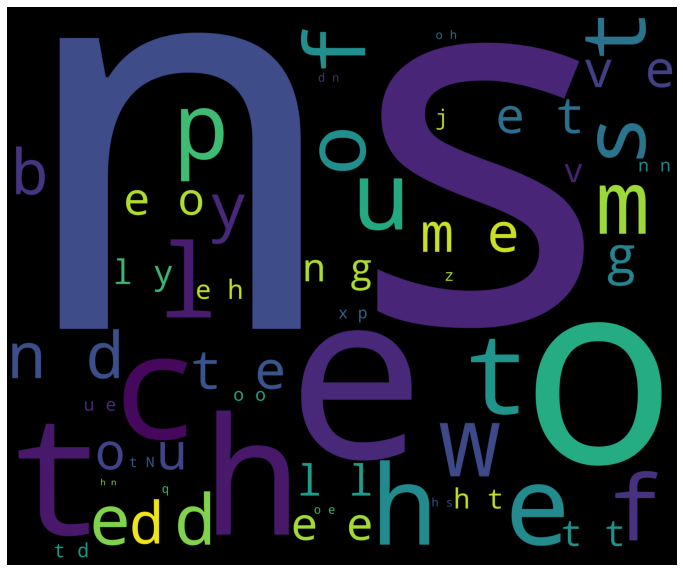

In [ ]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(txt1)
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

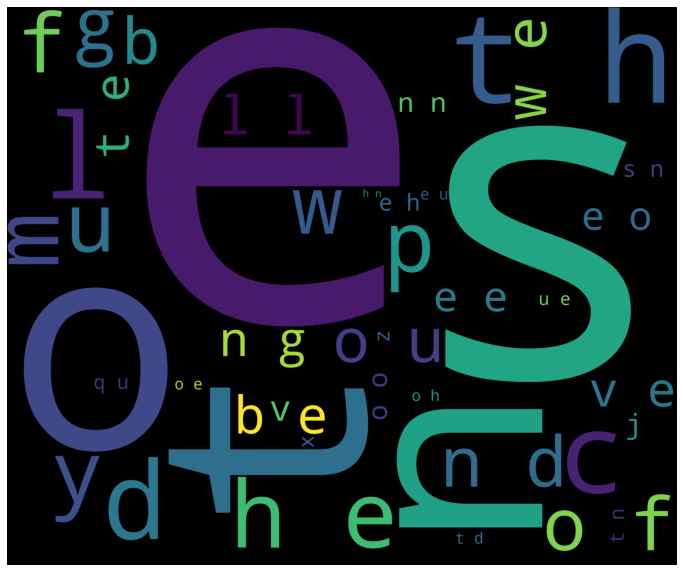

In [ ]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(txt2)
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

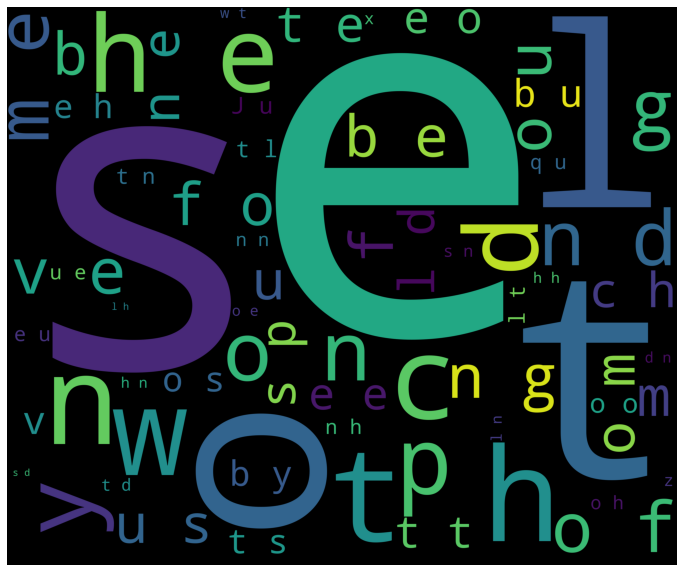

In [ ]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(txt3)
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()